In [2]:
import pandas as pd

In [2]:
# title 중복된값 제거

In [3]:
df_title = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [4]:
df_title = df_title[['title', 'id']]

In [5]:
df_title = df_title.drop_duplicates()

In [6]:
# rating 필요한 컬럼만 가공

In [7]:
df_rating = pd.read_csv('data/ratings.csv')

In [8]:
df_rating

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [9]:
df_rating = df_rating.iloc[ : , :2+1]

In [10]:
# merge 하기 위해 데이터 똑같이 맞춤

In [11]:
df_title = df_title.rename(columns={'id':'movieId'})

In [12]:
df_title

,title,movieId
0,Toy Story,862
1,Jumanji,8844
2,Grumpier Old Men,15602
3,Waiting to Exhale,31357
4,Father of the Bride Part II,11862
...,...,...
45461,Subdue,439050
45462,Century of Birthing,111109
45463,Betrayal,67758
45464,Satan Triumphant,227506


In [13]:
df_title = df_title.dropna()

In [14]:
df_title['movieId'] = df_title['movieId'].astype(int)

C:\Users\-\AppData\Local\Temp/ipykernel_2316/3391263016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['movieId'] = df_title['movieId'].astype(int)


In [15]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    45430 non-null  object
 1   movieId  45430 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 887.3+ KB


In [16]:
# 데이터 합치기

In [17]:
df = pd.merge(df_title, df_rating, on='movieId')

In [18]:
df

,title,movieId,userId,rating
0,Toy Story,862,1923,3.0
1,Toy Story,862,2103,5.0
2,Toy Story,862,5380,1.0
3,Toy Story,862,6177,4.0
4,Toy Story,862,6525,4.0
...,...,...,...,...
11436563,Century of Birthing,111109,33940,2.5
11436564,Century of Birthing,111109,172224,3.0
11436565,Century of Birthing,111109,210792,3.0
11436566,Century of Birthing,111109,225396,3.5


In [19]:
# rating 의 count 의 분포를 분석

In [20]:
df['title'].nunique()

7409

In [21]:
df.groupby('title')['rating'].count().describe()

count     7409.000000
mean      1543.604805
std       5404.904779
min          1.000000
25%          7.000000
50%         45.000000
75%        485.000000
max      91082.000000
Name: rating, dtype: float64

<AxesSubplot:>

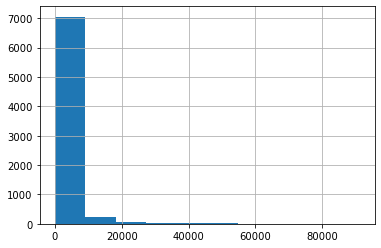

In [22]:
df.groupby('title')['rating'].count().to_frame()['rating'].hist()

In [23]:
# mean count 구하고 별점 높은 영화중 count 를 조절하여 자르자

In [24]:
ratings_df_mean = df.groupby('title')['rating'].mean()

In [25]:
ratings_df_count = df.groupby('title')['rating'].count()

In [26]:
ratings_df_mean = ratings_df_mean.to_frame()

In [27]:
ratings_df_mean.columns = ['mean']

In [28]:
ratings_df_count = ratings_df_count.to_frame()

In [29]:
ratings_df_count.columns = ['count']

In [30]:
ratings_mean_count_df = ratings_df_mean.join(ratings_df_count)

In [31]:
ratings_mean_count_df

,mean,count
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


In [32]:
ratings_mean_count_df['count'].describe()

count     7409.000000
mean      1543.604805
std       5404.904779
min          1.000000
25%          7.000000
50%         45.000000
75%        485.000000
max      91082.000000
Name: count, dtype: float64

<AxesSubplot:>

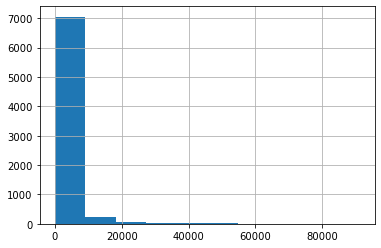

In [33]:
ratings_mean_count_df['count'].hist()

In [34]:
ratings_mean_count_df

,mean,count
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


In [35]:
ratings_mean_count_df = \
ratings_mean_count_df.loc[(ratings_mean_count_df['mean'] > 3) &
                          (ratings_mean_count_df['count'] > 5000) &
                          (ratings_mean_count_df['count'] < 12000), ]

In [36]:
ratings_mean_count_df

,mean,count
title,,
28 Days Later,3.216995,9438
300,3.726079,10357
7 Virgins,3.339387,6002
8 Women,3.634179,5679
88 Minutes,3.208466,10335
...,...,...
Yankee Doodle Dandy,3.461006,6283
Young Adam,3.219454,6744
Young Frankenstein,3.682266,5780


In [37]:
# 데이터 자른것의 영화만 df에서 가져오기

In [38]:
ratings_mean_count_df = ratings_mean_count_df.reset_index()

In [39]:
ratings_mean_count_df

,title,mean,count
0,28 Days Later,3.216995,9438
1,300,3.726079,10357
2,7 Virgins,3.339387,6002
3,8 Women,3.634179,5679
4,88 Minutes,3.208466,10335
...,...,...,...
254,Yankee Doodle Dandy,3.461006,6283
255,Young Adam,3.219454,6744
256,Young Frankenstein,3.682266,5780
257,Zatoichi,4.004338,11412


In [40]:
if :

SyntaxError: invalid syntax (Temp/ipykernel_2316/1317659341.py, line 1)

In [ ]:
df

In [ ]:
df = df.set_index('title').loc[ ratings_mean_count_df['title'].unique() , ].reset_index()

In [ ]:
df

In [ ]:
# df 피벗테이블 과 상관계수

In [ ]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title', aggfunc='mean')

In [ ]:
df_pivot

In [ ]:
df_corr = df_pivot.corr()

In [ ]:
df_corr

In [ ]:
df.to_csv('df.csv')
df_pivot.to_csv('df_pivot.csv')

In [ ]:
df_corr.to_csv('df_corr.csv')

In [ ]:
############################################################

In [ ]:
user_rating = pd.read_csv('data/user_rating.csv')

In [ ]:
user_rating

In [ ]:
# 내 영화 상관계수 하는 논리들

In [ ]:
user_rating['title'][0]

In [ ]:
df_user_corr = df_corr[user_rating['title'][0]].sort_values(ascending= False).to_frame()

In [ ]:
df_user_corr.columns = ['correlation']

In [ ]:
df_user_corr

In [ ]:
user_rating['rating'][0]

In [ ]:
df_user_corr['weight'] = user_rating['rating'][0] * df_user_corr['correlation']

In [ ]:
df_user_corr

In [ ]:
############################################################

In [ ]:
# 내가 영화에 준 별점을 상관계수에 채우는 작업

In [ ]:
user_rating

In [ ]:
similar_movies_list = pd.DataFrame()

for i in range( user_rating.shape[0] ) :
  movie_name = user_rating['title'][i]
  recom_movies = df_corr[movie_name].sort_values(ascending=False).to_frame()
  recom_movies.columns = ['correlation']
  recom_movies['weight'] = user_rating['rating'][i] * recom_movies['correlation']
  similar_movies_list = similar_movies_list.append( recom_movies )

In [ ]:
# 내 영화들 지우고 추천영화만 정렬해서 보여주는 작업

In [ ]:
similar_movies_list

In [ ]:
similar_movies_list = similar_movies_list.sort_values('weight' , ascending=False)
user_rating['title'].to_list()
similar_movies_list.drop( user_rating['title'].to_list() , axis=0,  inplace= True )

similar_movie = similar_movies_list.groupby('title')['weight'].max().sort_values(ascending = False).to_frame().reset_index()

similar_movie.loc[ : , 'title' ].to_frame().head(5)

In [ ]:
# 6/3 작업

In [ ]:
import pandas as pd
df_corr = pd.read_csv('df_corr.csv', index_col=0)
user_rating = pd.read_csv('data/user_rating.csv', index_col= 0)

In [ ]:
user_rating

In [ ]:
df_corr

In [ ]:
# 한개씩 드랍하는 논리
# 인덱스를 넣어서 그인덱스값 추출해서 drop

In [ ]:
list(user_rating['title'].values)

In [ ]:
list(enumerate(['A']))

In [ ]:
a = list(enumerate(user_rating['title'].values))

In [ ]:
a

In [ ]:
a[0]

In [ ]:
a[0][0]

In [ ]:
user_rating.drop(index= 1
        , axis=0)

In [ ]:
##############################################################

In [ ]:
# overview df 만들기

In [ ]:
df_overview = pd.read_csv('data/movies_metadata.csv')

In [ ]:
df_overview = df_overview[['overview', 'title']]

In [ ]:
df_overview

In [ ]:
df_overview.isnull().sum()

In [ ]:
df_overview['title'] = df_overview['title'].dropna()

In [ ]:
df_overview.nunique()

In [ ]:
df_overview = df_overview.drop_duplicates('title')

In [ ]:
df_overview

In [ ]:
df_overview = df_overview.set_index('title').loc[ ratings_mean_count_df['title'].unique() , ].reset_index()

In [ ]:
df_overview

In [ ]:
df_overview.loc[df_overview.duplicated(['overview'], keep=False) ]

In [ ]:
( df_overview.set_index('title') )

In [ ]:
df_overview.set_index('title').loc['28 Days Later'][0]

In [ ]:
df_overview.to_csv('df_overview.csv')

In [ ]:
##############################################################

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()
result = translator.translate('안녕하세요.', dest="ja")

In [ ]:
print(result)

In [ ]:
print(result.text)

In [ ]:
result.text

In [3]:
user_rating_reset = pd.read_csv('data/user_rating_reset.csv', index_col= 0)
user_rating = pd.read_csv('data/user_rating.csv', index_col= 0)

In [ ]:
if st.button('저장하기') :
            if ( user_rating.loc[ user_rating['userId'] == 999 , ]['userId'].tolist() ) == [] :
                user_rating = user_rating_reset.append( { 'title' : choice_movie , 'userId' : 999, 'rating' : float(choice_rating) }, ignore_index=True )
                user_rating.to_csv('data/user_rating.csv')
                
            elif ( ( (user_rating.loc[ user_rating['userId'] == 999 , ])['userId'] == 999).tolist() )[0] :
                user_rating = user_rating.append( { 'title' : choice_movie , 'userId' : 999, 'rating' : float(choice_rating) }, ignore_index=True )
                user_rating.to_csv('data/user_rating.csv')

In [4]:
user_rating

,title,rating,userId
0,28 Days Later,3.0,999
1,300,5.0,999


In [12]:
user_rating['title'].nunique()

2